In [107]:
#Loading Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Data Cleaning and Preliminary Analysis***

In [108]:
#Importing data (Orginal DataSet) in CSV format
df = pd.read_csv('vehicles_org.csv')

In [109]:
#Data Structure
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [110]:
shape_before_cleaning = df.shape
shape_before_cleaning

(426880, 26)

In [111]:
# Displaying all the columns filtered by the given condition
filtered_df = df[df["VIN"] == "1FMJU1JT1HEA52352"][['id','VIN','region', 'year', 'price', 'manufacturer', 'condition', 'posting_date']]
filtered_df

,id,VIN,region,year,price,manufacturer,condition,posting_date
76,7311818189,1FMJU1JT1HEA52352,auburn,2017.0,29590,ford,good,2021-04-24T08:52:07-0500
707,7311865995,1FMJU1JT1HEA52352,birmingham,2017.0,29590,ford,good,2021-04-24T10:21:06-0500
1935,7311801032,1FMJU1JT1HEA52352,dothan,2017.0,29590,ford,good,2021-04-24T08:08:57-0500
2201,7311915565,1FMJU1JT1HEA52352,florence / muscle shoals,2017.0,29590,ford,good,2021-04-24T11:41:02-0500
2377,7311823034,1FMJU1JT1HEA52352,gadsden-anniston,2017.0,29590,ford,good,2021-04-24T09:01:32-0500
...,...,...,...,...,...,...,...,...
420611,7311842926,1FMJU1JT1HEA52352,madison,2017.0,29590,ford,good,2021-04-24T09:40:52-0500
423786,7311784162,1FMJU1JT1HEA52352,milwaukee,2017.0,29590,ford,good,2021-04-24T07:11:52-0500
425368,7311832579,1FMJU1JT1HEA52352,sheboygan,2017.0,29590,ford,good,2021-04-24T09:21:05-0500
425834,7311967545,1FMJU1JT1HEA52352,wausau,2017.0,29590,ford,good,2021-04-24T13:01:24-0500


In [112]:
#Printing all the Columns
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [113]:
#Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [114]:
#Finding redundant listings of cars with the same engine number but in different locations
df[df["VIN"] == "1FMJU1JT1HEA52352"].head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
76,7311818189,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-04-24T08:52:07-0500
707,7311865995,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,33.52,-86.79,2021-04-24T10:21:06-0500
1935,7311801032,https://dothan.craigslist.org/ctd/d/dothan-201...,dothan,https://dothan.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,31.23,-85.40,2021-04-24T08:08:57-0500


In [115]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [116]:
# Generating descriptive statistics for the DataFrame
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [117]:
# Retrieving unique values in the 'manufacturer' column
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [118]:
# Printing the number of missing values in each column of the DataFrame
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [119]:
# Calculating the percentage of missing values in each column of the DataFrame
na_percentage = df.isna().sum() / df.shape[0] * 100
print(na_percentage)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


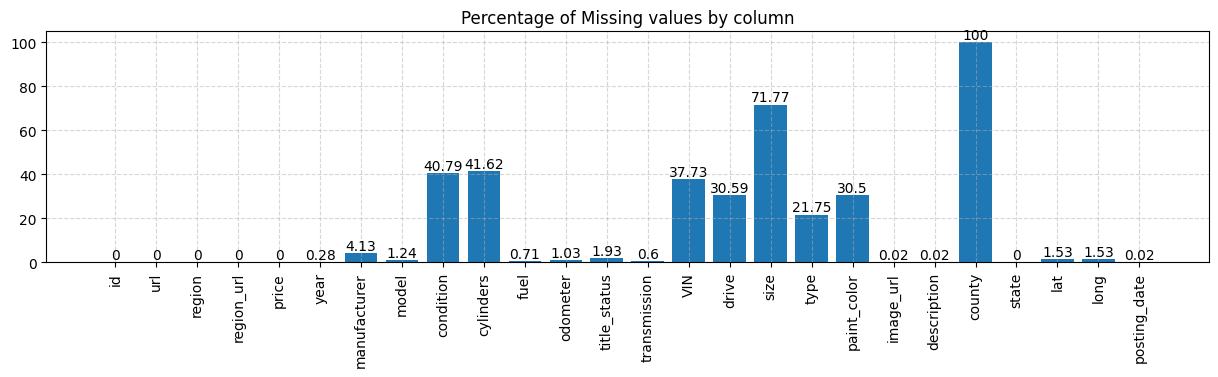

In [120]:
# Creating a bar plot to visualize the percentage of NaN values in each column
fig, ax = plt.subplots(figsize=[15, 3])
bars = ax.bar(x=df.columns, height=round(na_percentage, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of Missing values by column")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

In [121]:
# Dropping the 'county' column from the dataFrame
df.drop(columns='county', inplace=True)

In [122]:
#Checking for the number of unique values in our categorical column
num_col = list(df.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(df.select_dtypes(include="object").columns)


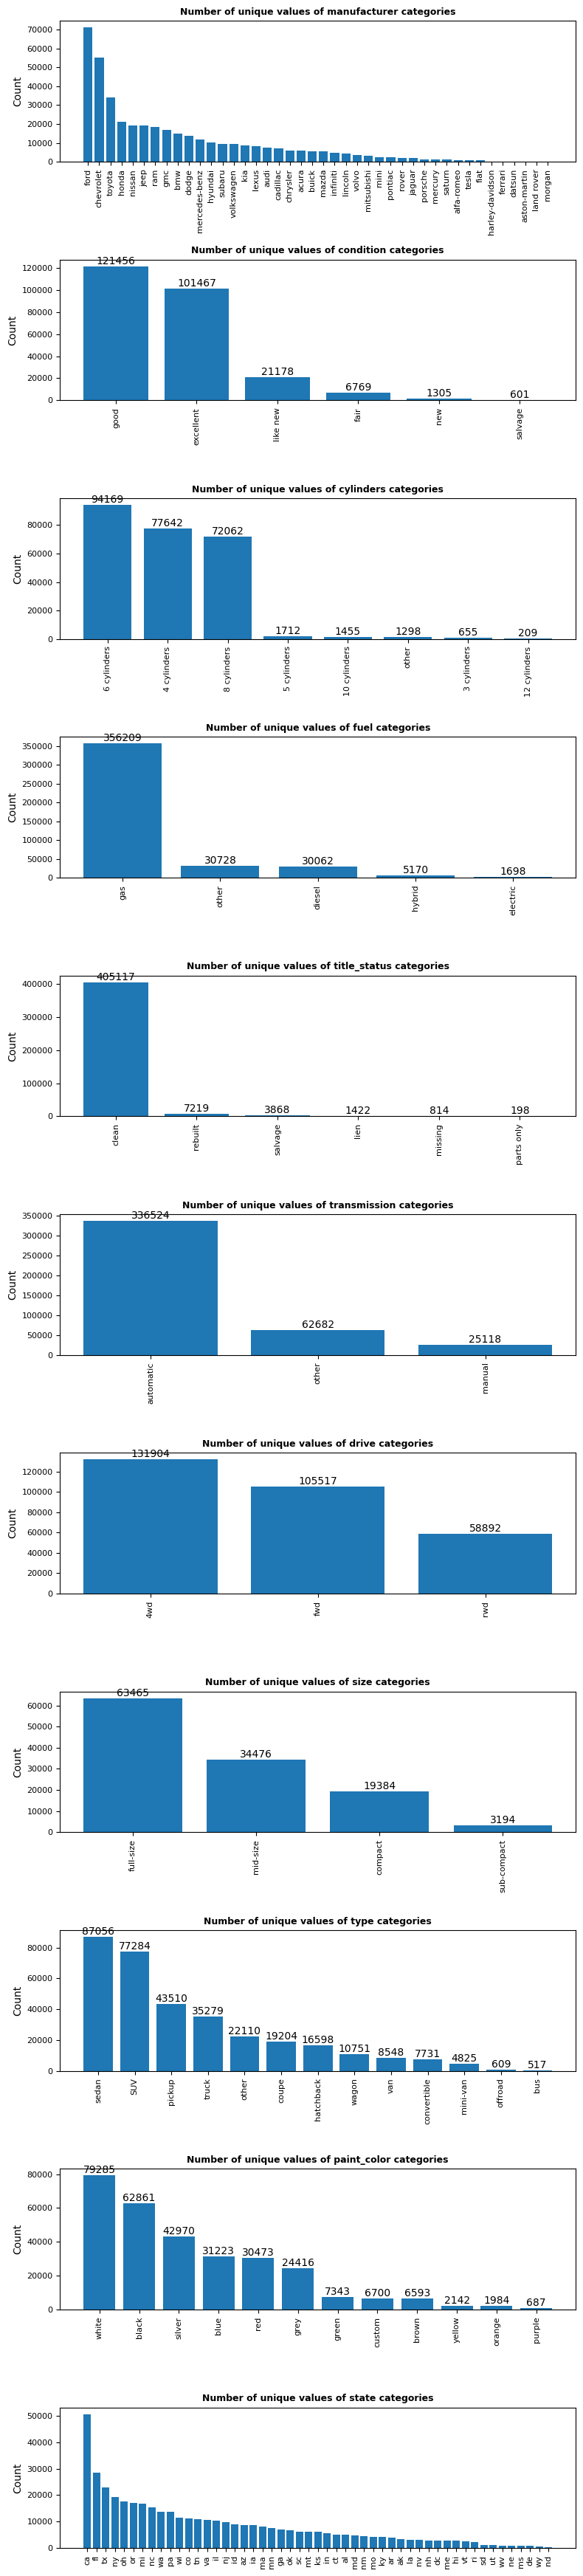

In [123]:
#visualizing categorical columns using barchart. we will exclude columns that have >100 unique values to prevent cluster in visualization

fig, ax = plt.subplots(11, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if df[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=df[column].value_counts().index,
                             height=df[column].value_counts())
        
        if df[column].nunique() < 15:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)

        # Rotation of axis labels for better visuals
        ax[index].tick_params(axis='x', rotation=90, labelsize= 8)
        ax[index].tick_params(axis='y', labelsize= 8)
        ax[index].set_ylabel('Count')
          # Set the subplot title
        ax[index].set_title(f"Number of unique values of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

In [124]:
#Checking duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

In [125]:
#Droping duplicates
df.drop_duplicates()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [126]:
#dropinbg columns irrelevant for analysis
df.drop(columns=["url", "region_url", "image_url"], inplace=True)

In [127]:
#remove cars with salvage condition because they are not suitable for Analysis
salvage_cars = df[df["condition"] == "salvage"].index
df.drop(index=salvage_cars, axis=0, inplace=True, errors="ignore")

In [128]:
#Price is the most important feature in our analysis
#Filtering enteries where price is >1million(1E6)
df[df["price"]>1E6].head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,...,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,33.633900,-86.598100,2021-05-02T13:24:09-0500
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,...,NaN,NaN,NaN,NaN,NaN,"1993 Ford Ranger, extended cab, 3.0 liter, ne...",al,31.053493,-85.825968,2021-05-02T17:18:25-0500


In [129]:
#we have very high prices and some that look to be a decimal point input problem
df.loc[105843]

id                                                     7314124996
region                                                    orlando
price                                                     6995495
year                                                       2014.0
manufacturer                                                dodge
model                                                     journey
condition                                                     NaN
cylinders                                             4 cylinders
fuel                                                          gas
odometer                                                 135888.0
title_status                                                clean
transmission                                            automatic
VIN                                             3C4PDCAB5ET204162
drive                                                         fwd
size                                                          NaN
type      

In [130]:
#we have almost 8% of the initial values that are either null or less than 10:
df["price"].quantile(0.08)

1.0

In [131]:
df[df["price"]<10].head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN


In [132]:
#the prices are logically incorrect
#define a critiria and remove data that do not meet them
min_price = df[df["price"] < 10].index
max_price = df[df["price"] > 1000000].index

In [133]:
df.drop(index=min_price, axis=0, errors="ignore", inplace=True)
df.drop(index=max_price, axis=0, errors="ignore", inplace=True)

In [134]:
#remove outliers for each year
#we can now perform precise oulier analysis
# we will remove outliers while considering the year of manufacture as a moving element. 
#This is because the median and interquartile range change substantially with respect to the car's year of manufacture:

for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["price"].quantile(0.25)
    q3 =df[df["year"] == year]["price"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["price"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["price"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

In [135]:
#odometer
#we will remove all cars that have more than 300,000 miles (482,000 km)
#and all cars that have fewer than 500 miles (~800 km) and are not categorized as new.
low_odometer =df[(df["odometer"] < 500) & (df["condition"] != "new")].index
high_odometer = df[df["odometer"] > 300000].index
df.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
df.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

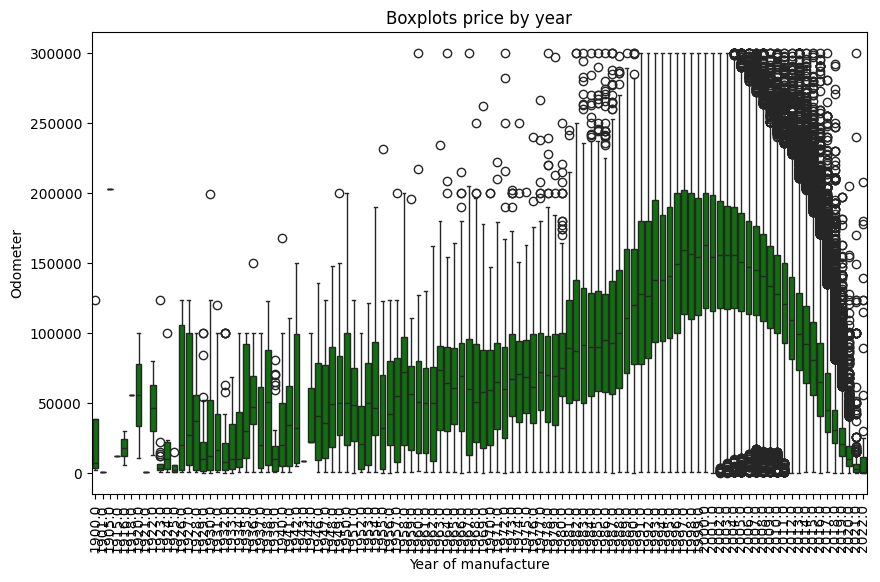

In [136]:
#removve odometer outliers using IQR 
#considering the odometer values for each year similar to what we did for price

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='odometer', data=df, color ='green')
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Odometer')
plt.show() 

In [137]:
for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["odometer"].quantile(0.25)
    q3 = df[df["year"] == year]["odometer"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["odometer"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["odometer"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

In [138]:
#year
#removing outlier values for year
print("2020:", df[df["year"] == 2020].shape)
print("2021:", df[df["year"] == 2021].shape)
print("2022:", df[df["year"] == 2022].shape)

2020: (16893, 22)
2021: (1028, 22)
2022: (38, 22)


In [139]:
low_year = df[df["year"] < 1908].index
high_year = df[df["year"] > 2021].index
df.drop(index=low_year, axis=0, errors="ignore", inplace=True)
df.drop(index=high_year, axis=0, errors="ignore", inplace=True)

**Handling duplicate values**

In [140]:
#During the statistical description of categorical variables, we detected a problem of duplicate values in the VIN

df["VIN"].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
5GAERAKW1KJ111545      1
1G1JC6SB8E4221416      1
3N1BC11EX8L420351      1
JM3KFABL8H0125562      1
SAJGX2749VCOO8376      1
Name: count, Length: 103441, dtype: int64

In [141]:
df[df["VIN"] == "1FMJU1JT1HEA52352"].head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
76,7311818189,auburn,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-04-24T08:52:07-0500
707,7311865995,birmingham,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,33.52,-86.79,2021-04-24T10:21:06-0500
1935,7311801032,dothan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,31.23,-85.40,2021-04-24T08:08:57-0500


In [142]:
#using the manufacturer, model, price, year, and VIN as reference values, we will proceed to remove all duplicates we find:

df.drop_duplicates(subset=["price", "year", "manufacturer", "model", "VIN"], keep="first", inplace=True)

**Columns with NaN values**

In [143]:
df.isna().sum() / df.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.295776
manufacturer     3.997453
model            1.363776
condition       38.529613
cylinders       34.122226
fuel             0.667028
odometer         0.577399
title_status     1.722763
transmission     0.443428
VIN             48.721372
drive           27.046253
size            63.868198
type            24.186145
paint_color     28.441635
description      0.025474
state            0.000000
lat              0.531641
long             0.531641
posting_date     0.024530
dtype: float64

In [144]:
#established a 40% threshold for removing null values, let us remove all columns that meet this condition
#remove title_status not provide useful info
df.drop(columns=["VIN", "size", "title_status"], inplace=True)

In [145]:
#removing remaining NaNs
df.dropna(inplace=True)
df.isna().sum()


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [146]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [147]:
shape_after_cleaning = df.shape
print(shape_after_cleaning)

(71094, 19)


In [148]:
print(shape_before_cleaning)

(426880, 26)


In [149]:
#Refined percentage
print("Refined Data perecentage")
print(f"{round((shape_after_cleaning[0] / shape_before_cleaning[0] * 100), 3)}%")

Refined Data perecentage
16.654%


In [150]:
df['odometer'] = df['odometer'].astype("int64")
df['year'] = df['year'].astype("int64")

**Feature Relations**

In [151]:
df.corr(numeric_only=True)

,id,price,year,odometer,lat,long
id,1.000000,-0.036401,-0.006386,0.031262,-0.043661,-0.137227
price,-0.036401,1.000000,0.262447,-0.507748,-0.004211,-0.096932
year,-0.006386,0.262447,1.000000,-0.179654,0.001551,0.009490
odometer,0.031262,-0.507748,-0.179654,1.000000,0.006333,0.021456
lat,-0.043661,-0.004211,0.001551,0.006333,1.000000,-0.026491
long,-0.137227,-0.096932,0.009490,0.021456,-0.026491,1.000000


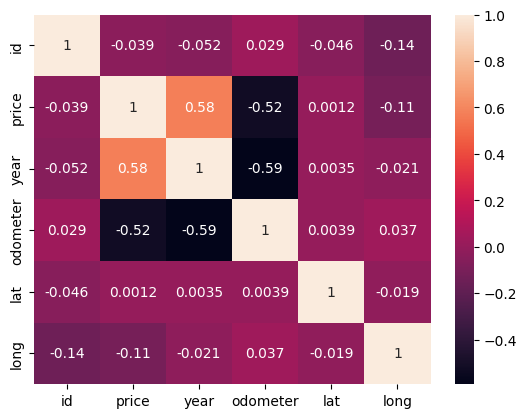

In [152]:
#let us consider the year vs price correlation for yeras post 1998
sns.heatmap(df[df["year"] >= 1998].corr(numeric_only=True), annot=True)
plt.show()

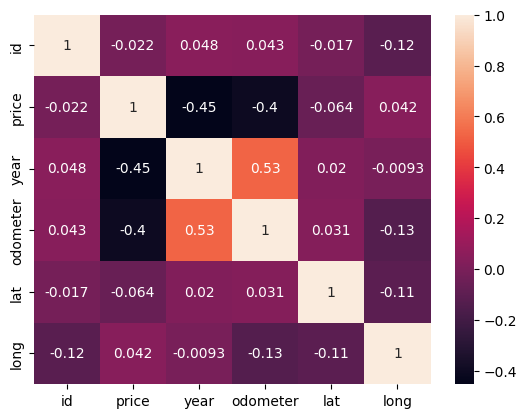

In [153]:
#let us consider the year vs price correlation for yeras before 1998
sns.heatmap(df[df["year"] < 1998].corr(numeric_only=True), annot=True)
plt.show()

In [154]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [155]:
df.shape

(71094, 19)

In [156]:
import datetime
# Convert 'posting_date' column to Timestamp with UTC=True
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

# Calculate car age
df['car_age'] = df['posting_date'].dt.year - df['year']

# Convert car age to integer
df['car_age'] = df['car_age'].astype(int)


In [157]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date',
       'car_age'],
      dtype='object')

In [158]:
#dropinbg columns irrelevant for analysis
df.drop(columns=["id","year", "posting_date", "region","model","description"], inplace=True)

Creating a new column 'Odometer_Price_Ratio' which is the ratio of the odometer reading to the price of the car. This will help us understand the relationship between the price of the car and the distance it has traveled.

In [159]:
data_cleaned = df
data_cleaned['Odometer_Price_Ratio'] = data_cleaned['odometer'] / data_cleaned['price']

data_cleaned.head(2)


,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,car_age,Odometer_Price_Ratio
31,15000,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al,32.592,-85.5189,8,8.533333
32,27990,gmc,good,8 cylinders,gas,68696,other,4wd,pickup,black,al,32.590,-85.4800,9,2.454305


In [160]:
# Group by manufacturer and calculate average odo_price
AVG_Odo_Price_Ratio  = data_cleaned.groupby('manufacturer')['Odometer_Price_Ratio'].mean().round(2).reset_index()
#output_filename = 'odo_price_By_Manu.csv' 
#odo_price_By_Manu.to_csv(output_filename, index=False)
#print(f"Updated DataFrame saved to {output_filename}")
AVG_Odo_Price_Ratio.head(4)

,manufacturer,Odometer_Price_Ratio
0,acura,35.05
1,alfa-romeo,8.34
2,aston-martin,1.05
3,audi,22.33


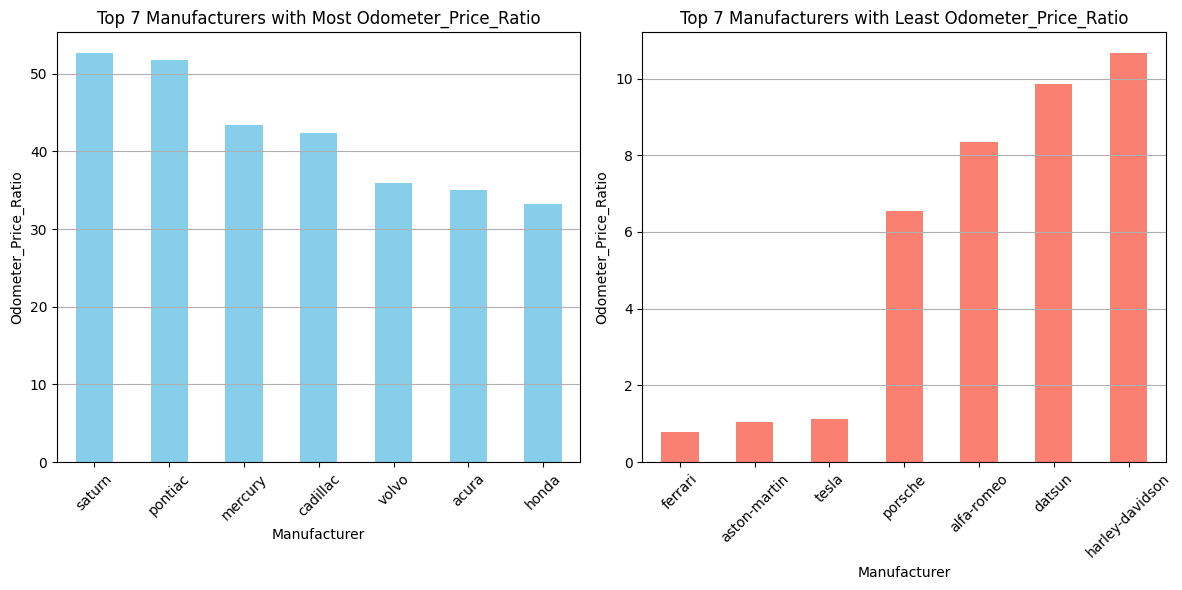

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the Odometer_Price_Ratio and stored it in the DataFrame df

# Top 7 manufacturers with the most Odometer_Price_Ratio
top_ratio_manufacturers = df.groupby('manufacturer')['Odometer_Price_Ratio'].mean().nlargest(7)
top_ratio_manufacturers = top_ratio_manufacturers.sort_values(ascending=False)

# Top 7 manufacturers with the least Odometer_Price_Ratio
bottom_ratio_manufacturers = df.groupby('manufacturer')['Odometer_Price_Ratio'].mean().nsmallest(7)
bottom_ratio_manufacturers = bottom_ratio_manufacturers.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for top manufacturers with most Odometer_Price_Ratio
plt.subplot(1, 2, 1)
top_ratio_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 7 Manufacturers with Most Odometer_Price_Ratio')
plt.xlabel('Manufacturer')
plt.ylabel('Odometer_Price_Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot for top manufacturers with least Odometer_Price_Ratio
plt.subplot(1, 2, 2)
bottom_ratio_manufacturers.plot(kind='bar', color='salmon')
plt.title('Top 7 Manufacturers with Least Odometer_Price_Ratio')
plt.xlabel('Manufacturer')
plt.ylabel('Odometer_Price_Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [162]:
data_cleaned.shape

(71094, 15)

In [163]:
data_cleaned.columns

Index(['price', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'lat', 'long',
       'car_age', 'Odometer_Price_Ratio'],
      dtype='object')

***Feature Engineering***

In [164]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define columns for one-hot encoding and frequency encoding
df1 = data_cleaned 
columns_one_hot = ['condition', 'fuel', 'transmission', 'drive']
columns_frequency = ['type', 'manufacturer', 'paint_color', 'car_age', 'cylinders']
# Perform one-hot encoding for categorical columns
for col in columns_one_hot:
    df1 = pd.concat([df1, pd.get_dummies(df1[col], prefix=col)], axis=1)
    df1.drop(col, axis=1, inplace=True)
# Perform frequency encoding for categorical columns
for col in columns_frequency:
    freq_encoder = df1[col].value_counts(normalize=True)
    df1[col + '_freq'] = df1[col].map(freq_encoder)
    df1.drop(col, axis=1, inplace=True)


#print(f"Preprocessed data saved to {output_filename}")
columns_to_replace = ['condition_excellent', 'condition_fair', 'condition_good', 
                      'condition_like new', 'condition_new', 'fuel_diesel', 
                      'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 
                      'transmission_automatic', 'transmission_manual', 
                      'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd']
df1[columns_to_replace] = df1[columns_to_replace].astype(int)

output_filename = 'featured_car_data.csv' 
df1.to_csv(output_filename, index=False)
print(f"Updated DataFrame saved to {output_filename}")



Updated DataFrame saved to featured_car_data.csv


In [165]:
df1.columns

Index(['price', 'odometer', 'state', 'lat', 'long', 'Odometer_Price_Ratio',
       'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_new', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd',
       'drive_rwd', 'type_freq', 'manufacturer_freq', 'paint_color_freq',
       'car_age_freq', 'cylinders_freq'],
      dtype='object')

## Clustering and Modelling 
* K-Means Clustering (generates 5 different clustered csv files)
* Linear Regressor
* Decision Tree Regressor
* Random forests
* XG Boost

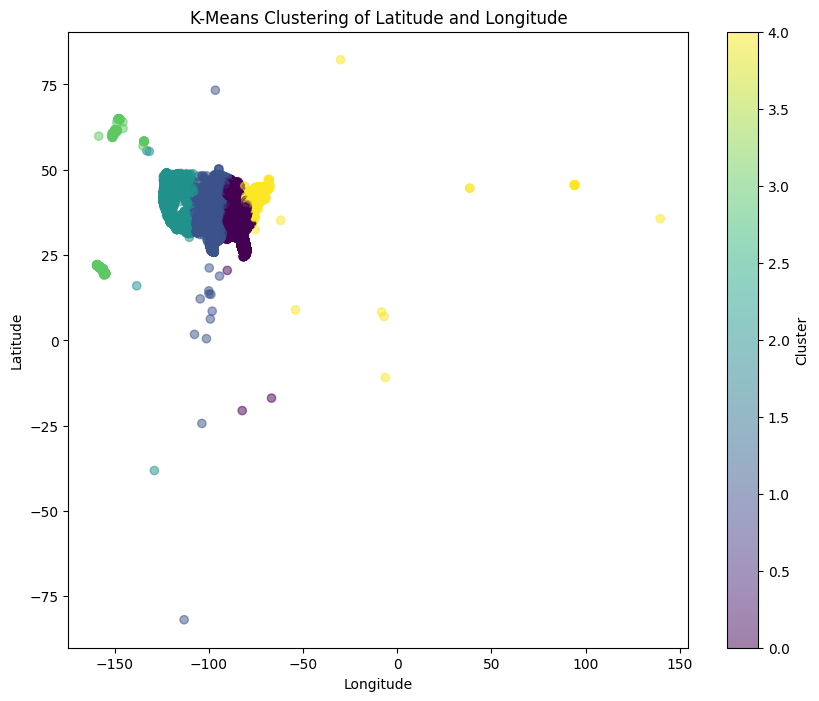

Cluster Centers:
Cluster 1: Latitude = -84.13358651678428, Longitude = 36.596822927175545
Cluster 2: Latitude = -97.61107082940455, Longitude = 37.95601634289412
Cluster 3: Latitude = -118.41359075078051, Longitude = 39.17245258142874
Cluster 4: Latitude = -153.0578216210937, Longitude = 43.2124146171875
Cluster 5: Latitude = -74.4950847380729, Longitude = 41.16385785499906
K-means clustering complete! The updated dataset with cluster labels is saved as 'ML_with_clusters.csv'
CSV files for each cluster Creatingd successfully!


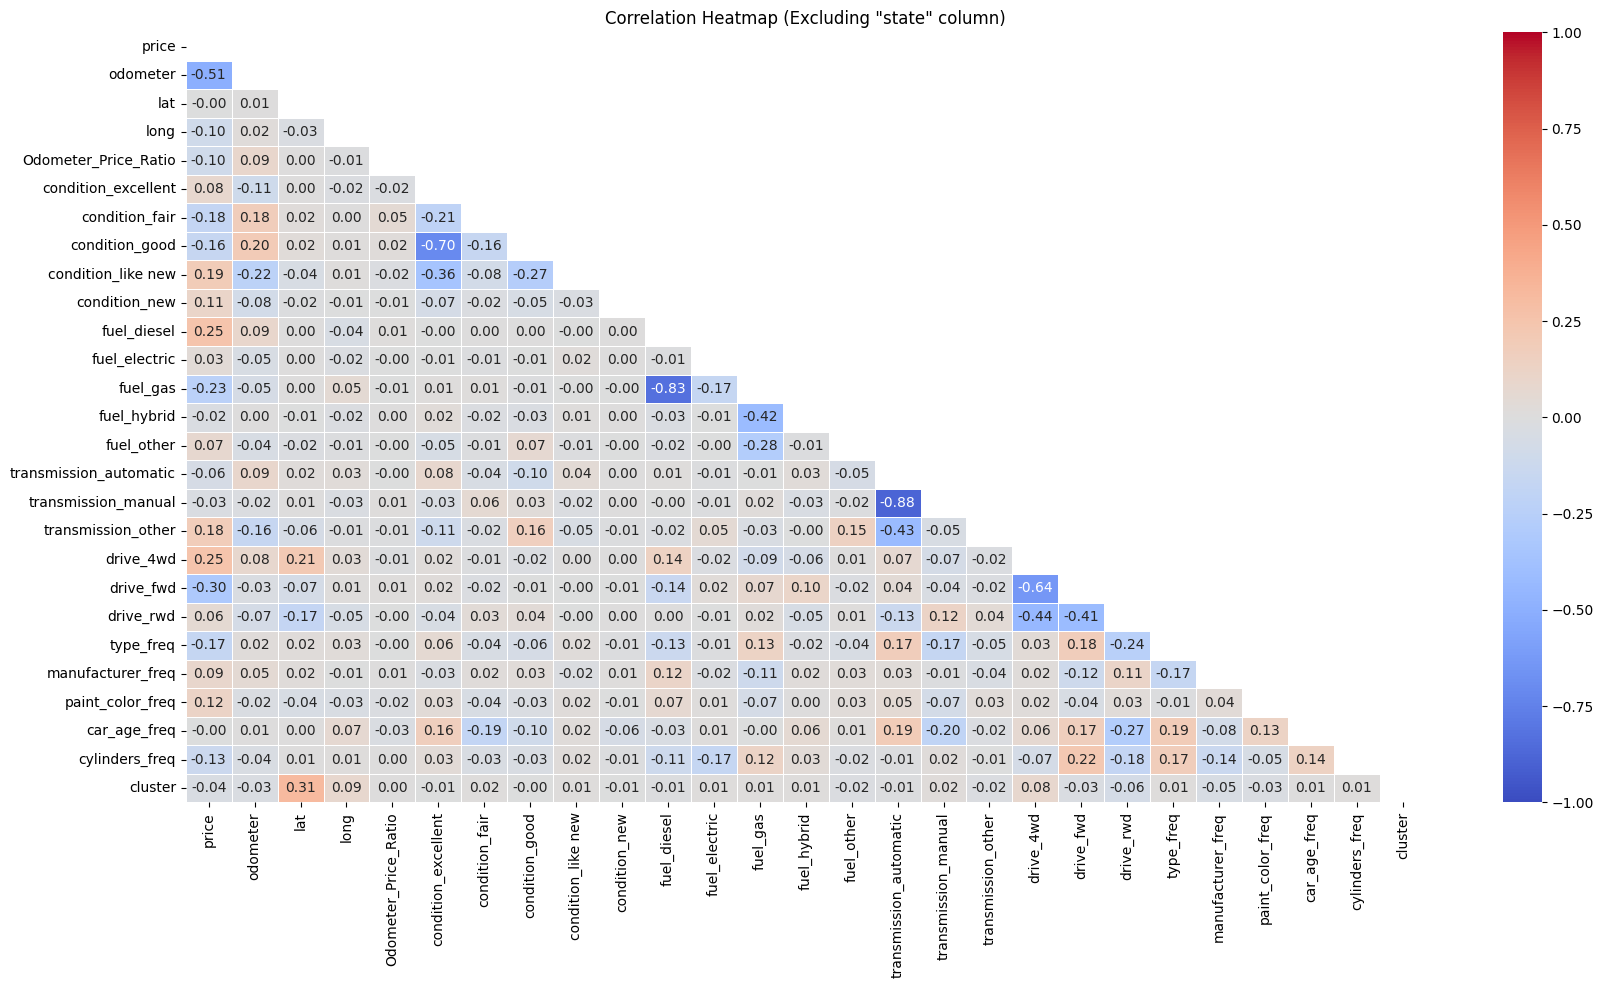

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


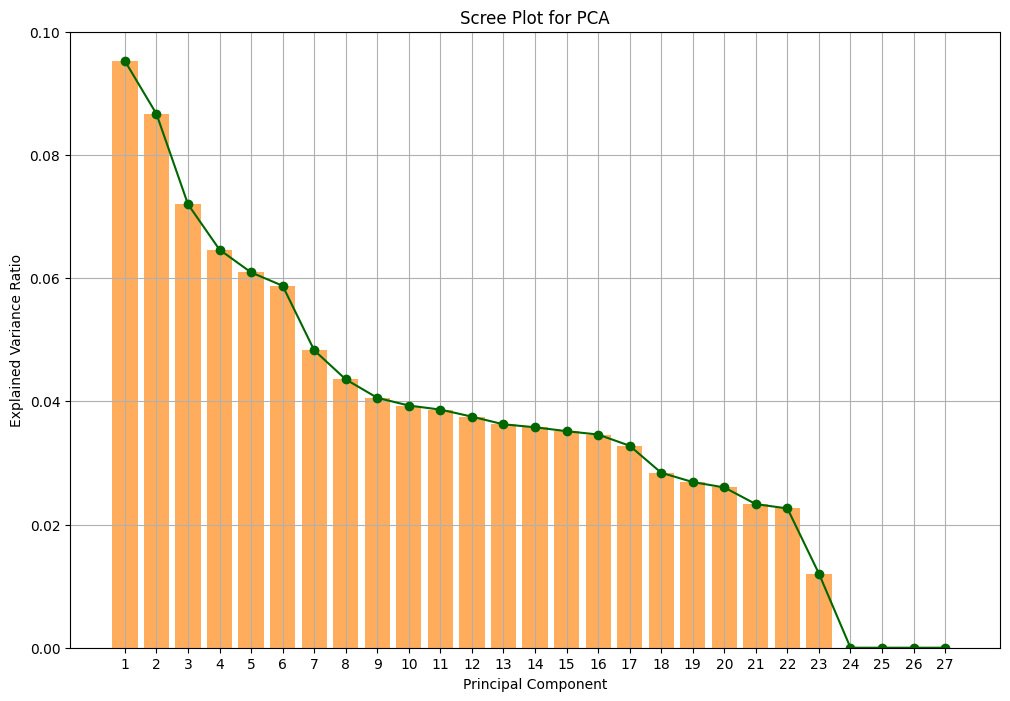

R2 Score of LinearRegression() model on training data: 49.409744801612035
R2 Score of LinearRegression() model on testing data: 48.41536862157228
RMSE of LinearRegression() model on training data: 8311.2702517726
RMSE of LinearRegression() model on testing data: 8347.61101540963


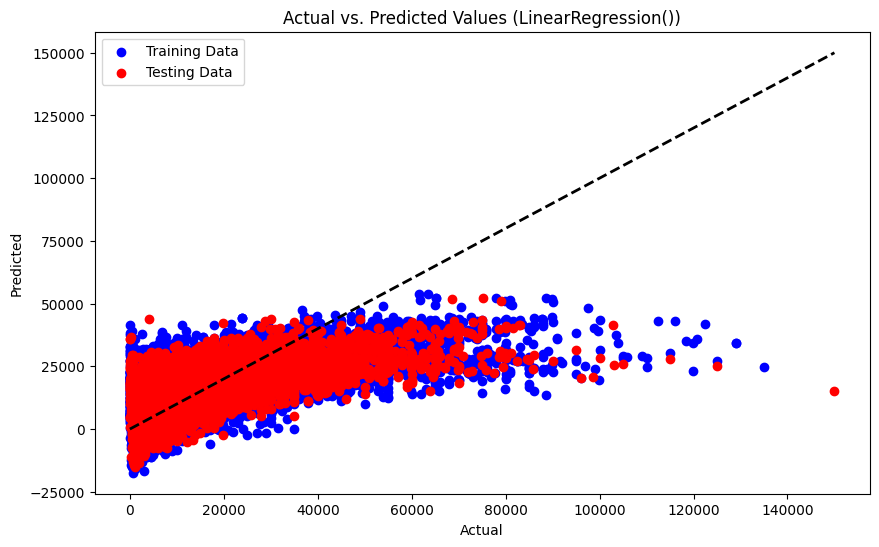

R2 Score of DecisionTreeRegressor() model on training data: 99.97664849840075
R2 Score of DecisionTreeRegressor() model on testing data: 53.141225491351676
RMSE of DecisionTreeRegressor() model on training data: 178.56295957001535
RMSE of DecisionTreeRegressor() model on testing data: 7956.0499476256555


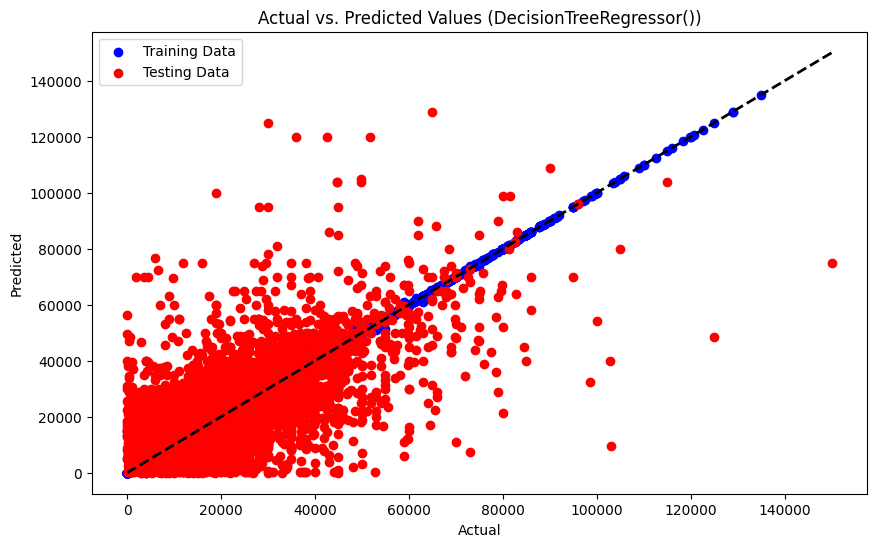

R2 Score of RandomForestRegressor() model on training data: 96.70500499377215
R2 Score of RandomForestRegressor() model on testing data: 75.67211177827373
RMSE of RandomForestRegressor() model on training data: 2121.101003678355
RMSE of RandomForestRegressor() model on testing data: 5732.63437591712


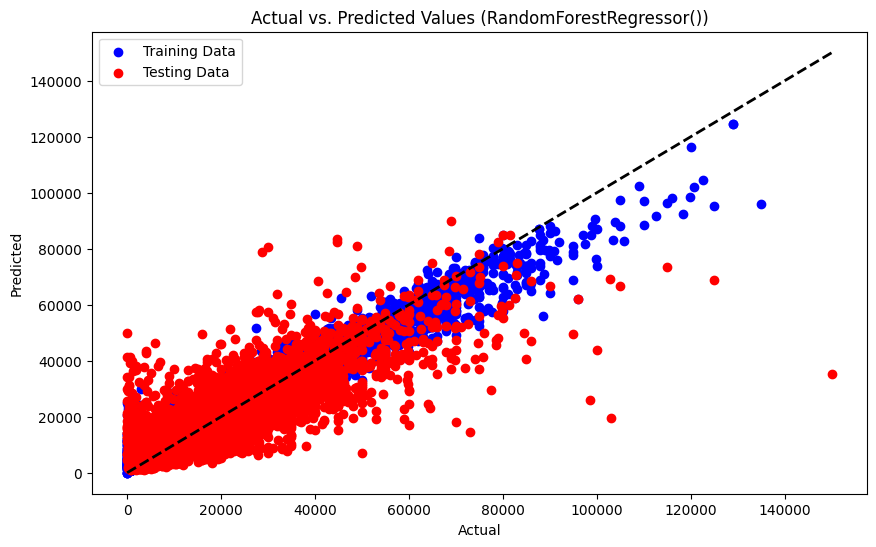

R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on training data: 86.61279650692306
R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rou

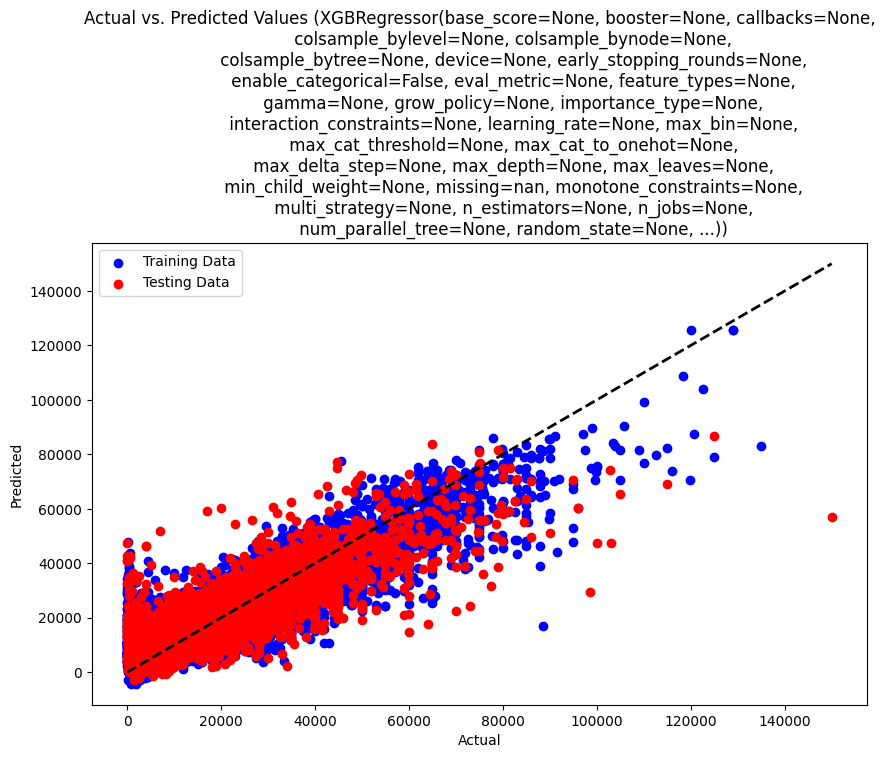

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [14053.15]
Test R2 Score: 0.7553, Test RMSE: 5748.9909
Test MSE: 33050896.7686
Predicted price using Decision Tree model: [14000.]
Test R2 Score: 0.5345, Test RMSE: 7929.8432
Test MSE: 62882412.6373
Predicted price using XGBoost model: [11684.719]
Test R2 Score: 0.7921, Test RMSE: 5299.8485
Test MSE: 28088393.6687
Predicted price using Linear Regression model: [12924.74832522]
Test R2 Score: 0.4842, Test RMSE: 8347.6110
Test MSE: 69682609.6646


In [166]:

%run Vehicle_modeling_ML.ipynb

## Modelling on Clusters
Running all ipynb files for all generated clusters
* Linear Regressor
* Decision Tree Regressor
* Random forests
* XG Boost

['al', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'id', 'il', 'in', 'ia', 'ky', 'la', 'ma', 'mi', 'mn', 'ms', 'mo', 'nc', 'nj', 'ny', 'nh', 'oh', 'or', 'pa', 'sc', 'tn', 'tx', 'va', 'wv', 'wi']
33


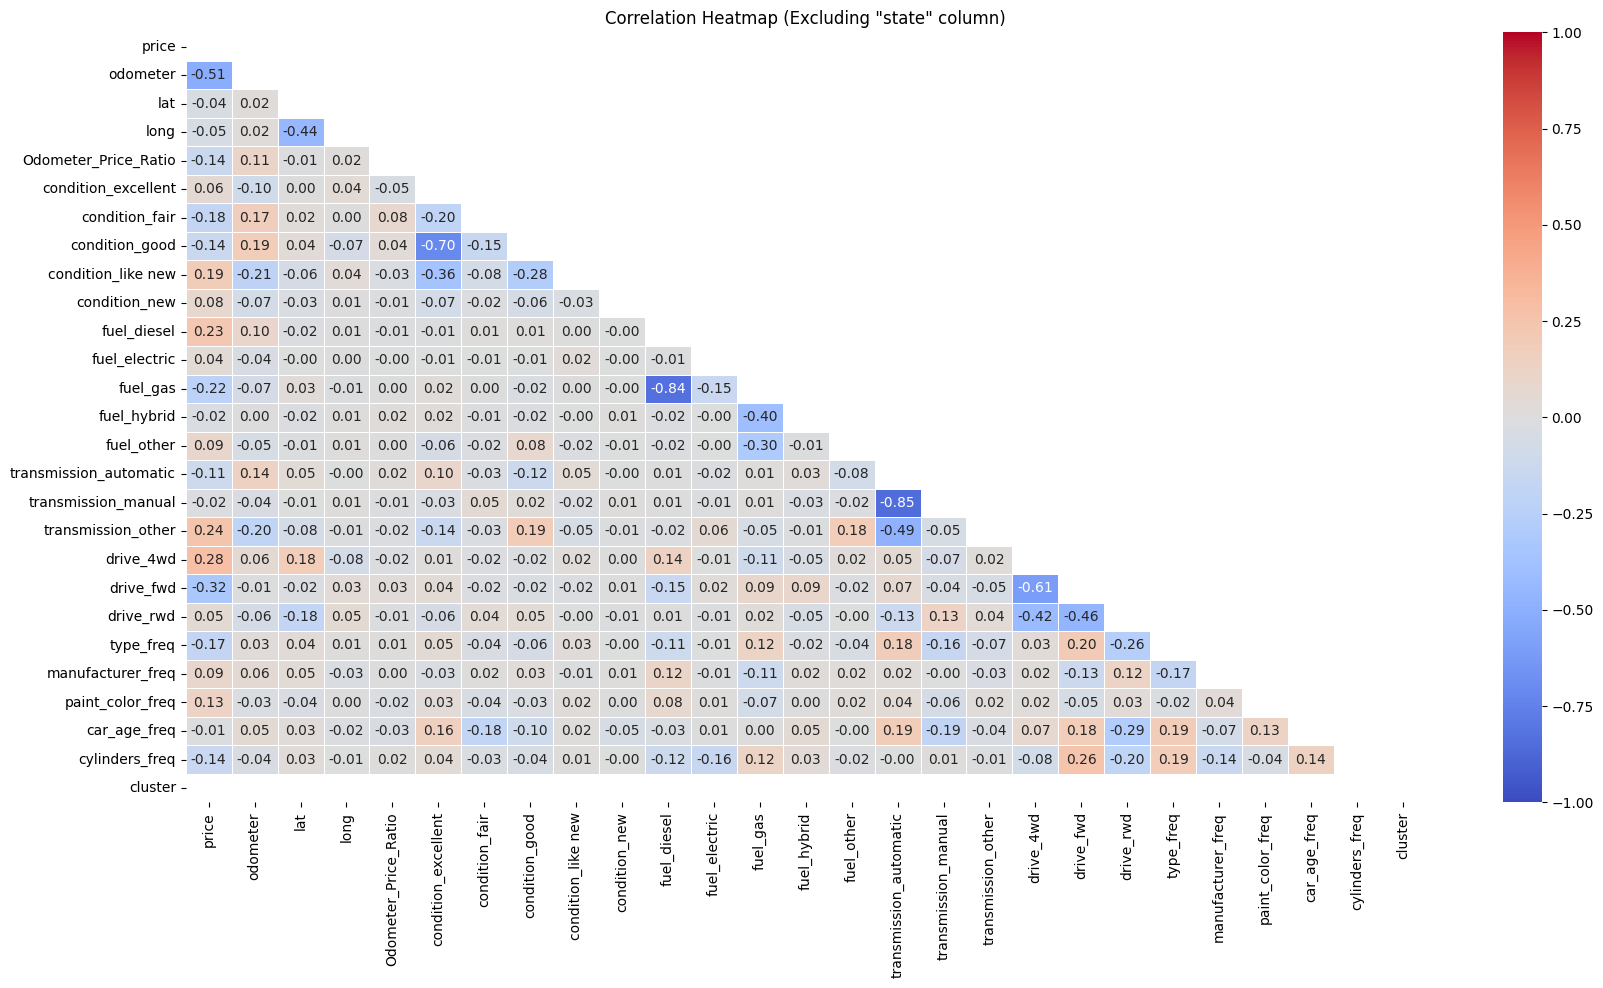

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


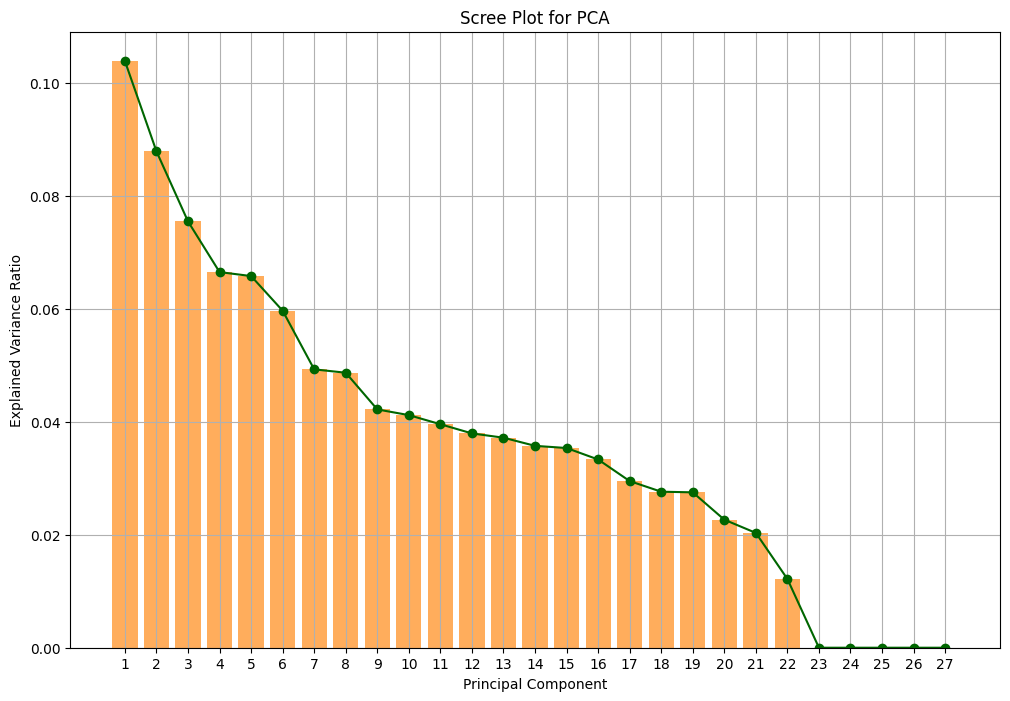

r2_Score of LinearRegression() model on training Data is: 51.027283660207054
r2_Score of LinearRegression() model on testing Data is: 50.74034403351402
RMSE of LinearRegression() model on training Data is: 7921.449802324311
RMSE of LinearRegression() model on testing Data is: 7957.372126688698
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.9785818196971
r2_Score of DecisionTreeRegressor() model on testing Data is: 49.77868481649813
RMSE of DecisionTreeRegressor() model on training Data is: 165.66045996194381
RMSE of DecisionTreeRegressor() model on testing Data is: 8034.669590872066
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.56057116840637
r2_Score of RandomForestRegressor() model on testing Data is: 74.26476610877239
RMSE of RandomForestRe

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [13368.27]
Test R2 Score: 0.7447, Test RMSE: 5729.0009
Predicted price using Decision Tree model: [14000.]
Test R2 Score: 0.5221, Test RMSE: 7837.9277
Predicted price using XGBoost model: [13022.526]
Test R2 Score: 0.7958, Test RMSE: 5123.0354
Predicted price using Linear Regression model: [12860.69573033]
Test R2 Score: 0.5074, Test RMSE: 7957.3721
Predicted price using Random Forest model: [13368.27]
Test R2 Score: 0.7447, Test RMSE: 5729.0009
Test MSE: 32821451.2626
Predicted price using Decision Tree model: [14000.]
Test R2 Score: 0.5221, Test RMSE: 7837.9277
Test MSE: 61433110.5009
Predicted price using XGBoost model: [13022.526]
Test R2 Score: 0.7958, Test RMSE: 5123.0354
Test MSE: 26245491.3627
Predicted price using Linear Regression model: [12860.69573033]
Test R2 Score: 0.5074, Test RMSE: 7957.3721
Test MSE: 633197

In [167]:
%run Vehicle_Clusters0.ipynb

['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'fl', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wi', 'wy']
42


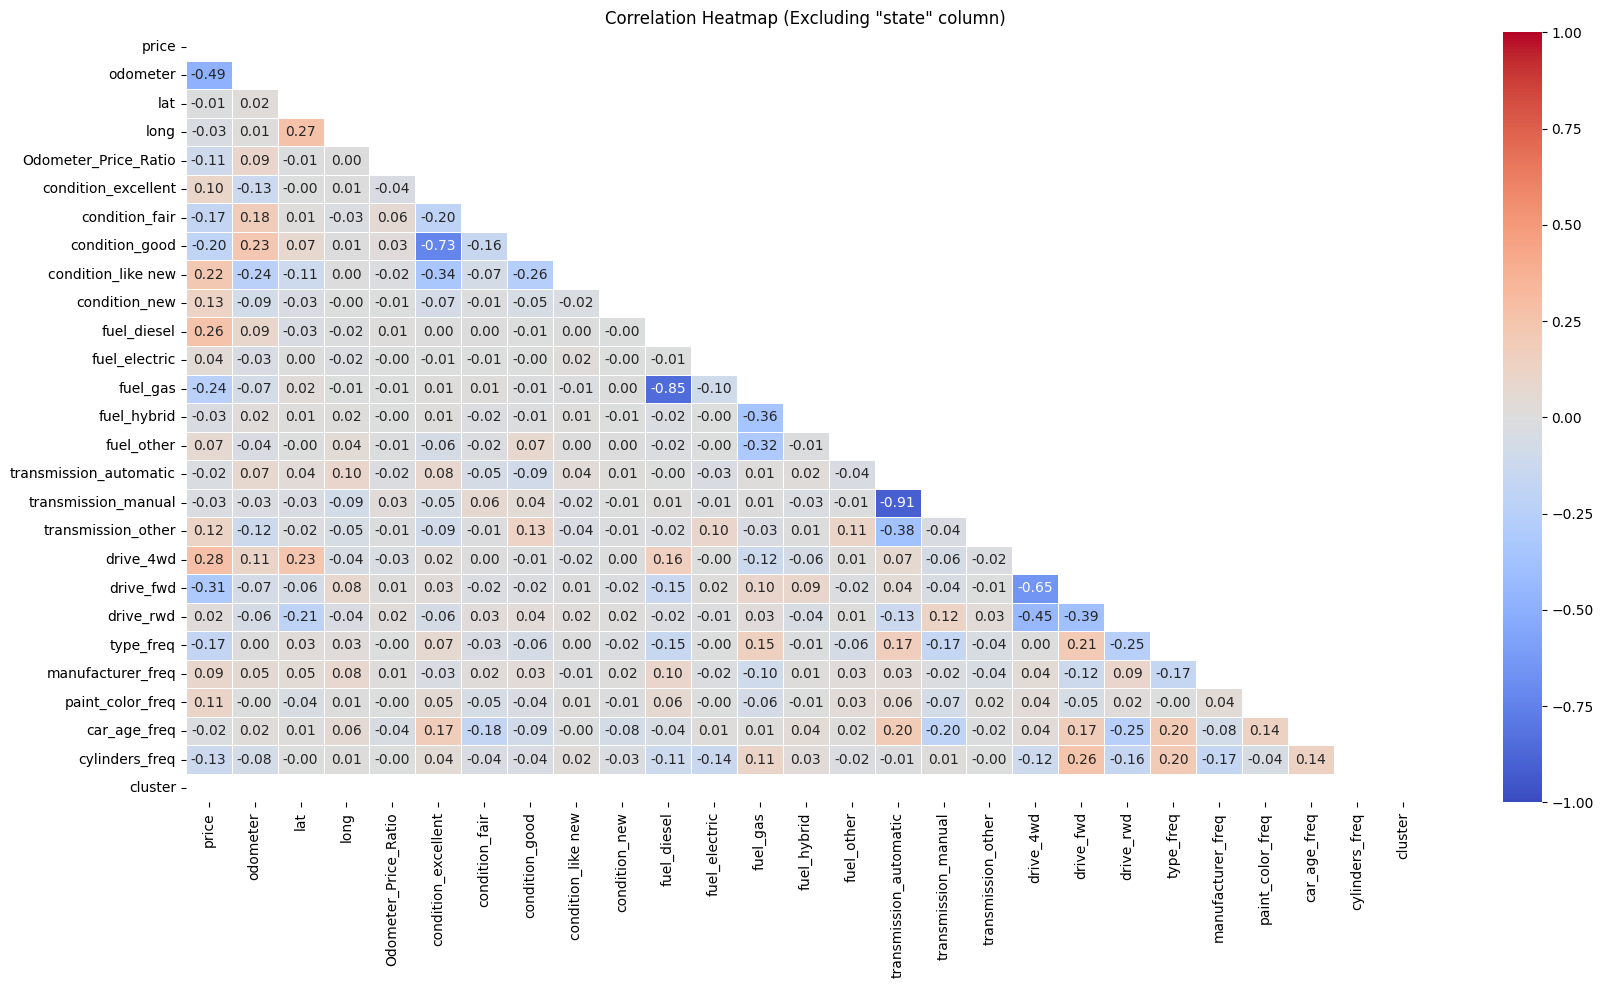

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


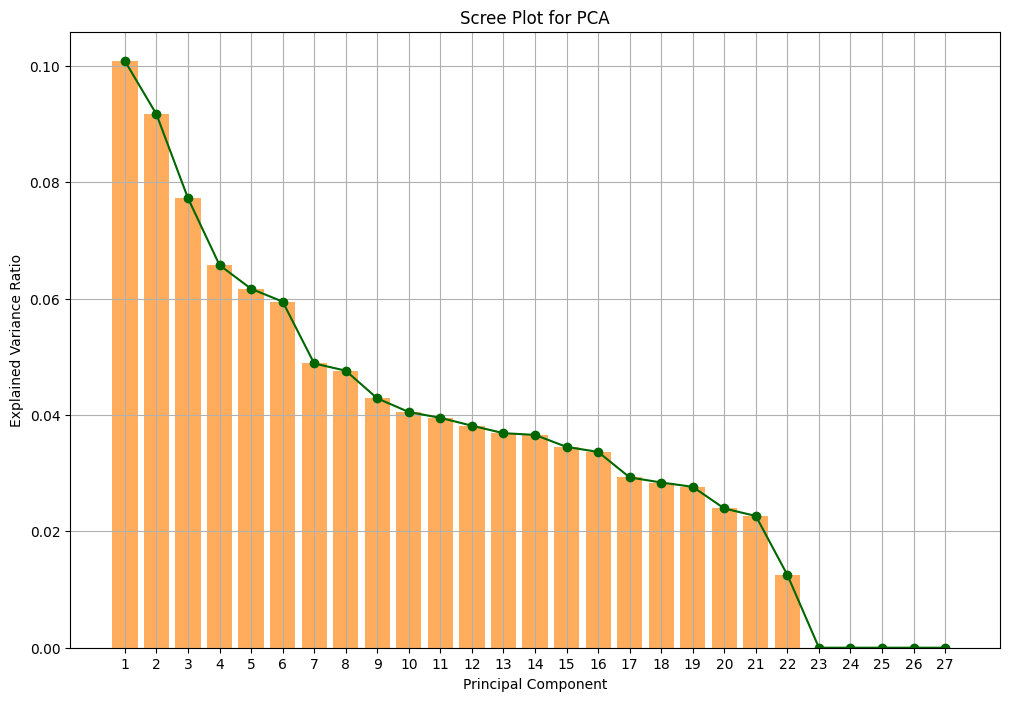

r2_Score of LinearRegression() model on training Data is: 50.046909728655784
r2_Score of LinearRegression() model on testing Data is: 48.56543638783545
RMSE of LinearRegression() model on training Data is: 8298.330983873691
RMSE of LinearRegression() model on testing Data is: 8308.054887892904
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99185361091556
r2_Score of DecisionTreeRegressor() model on testing Data is: 50.23443231080731
RMSE of DecisionTreeRegressor() model on training Data is: 105.97224800184134
RMSE of DecisionTreeRegressor() model on testing Data is: 8172.1496064963285
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.27674924889386
r2_Score of RandomForestRegressor() model on testing Data is: 71.50500863806913
RMSE of RandomForest

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [10127.50333333]
Test R2 Score: 0.7114, Test RMSE: 6222.7666
Predicted price using Decision Tree model: [8750.]
Test R2 Score: 0.4928, Test RMSE: 8250.3675
Predicted price using XGBoost model: [11621.23]
Test R2 Score: 0.7720, Test RMSE: 5531.3370
Predicted price using Linear Regression model: [12988.81010753]
Test R2 Score: 0.4857, Test RMSE: 8308.0549
Predicted price using Random Forest model: [10127.50333333]
Test R2 Score: 0.7114, Test RMSE: 6222.7666
Test MSE: 38722824.0157
Predicted price using Decision Tree model: [8750.]
Test R2 Score: 0.4928, Test RMSE: 8250.3675
Test MSE: 68068563.7828
Predicted price using XGBoost model: [11621.23]
Test R2 Score: 0.7720, Test RMSE: 5531.3370
Test MSE: 30595688.6112
Predicted price using Linear Regression model: [12988.81010753]
Test R2 Score: 0.4857, Test RMSE: 8308.0549
Test MSE

In [168]:
%run Vehicle_Clusters1.ipynb

['ak', 'az', 'ca', 'co', 'dc', 'fl', 'id', 'in', 'mi', 'mt', 'nc', 'nv', 'nj', 'nm', 'ny', 'oh', 'or', 'pa', 'tx', 'ut', 'wa', 'wi', 'wy']
23


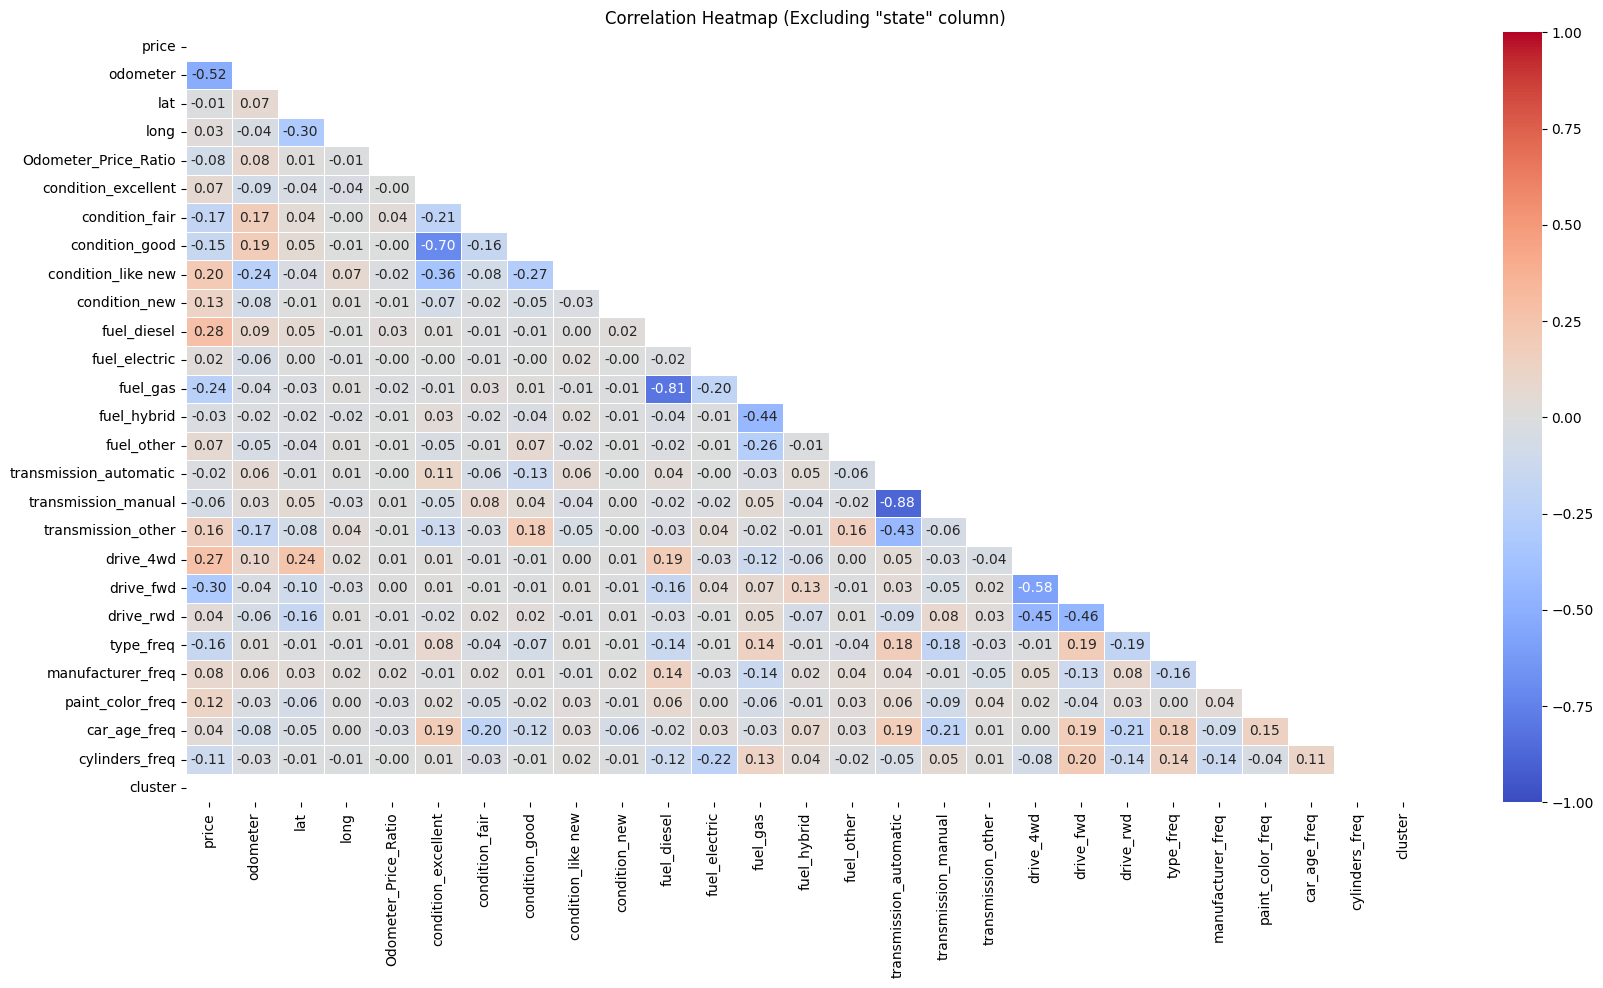

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


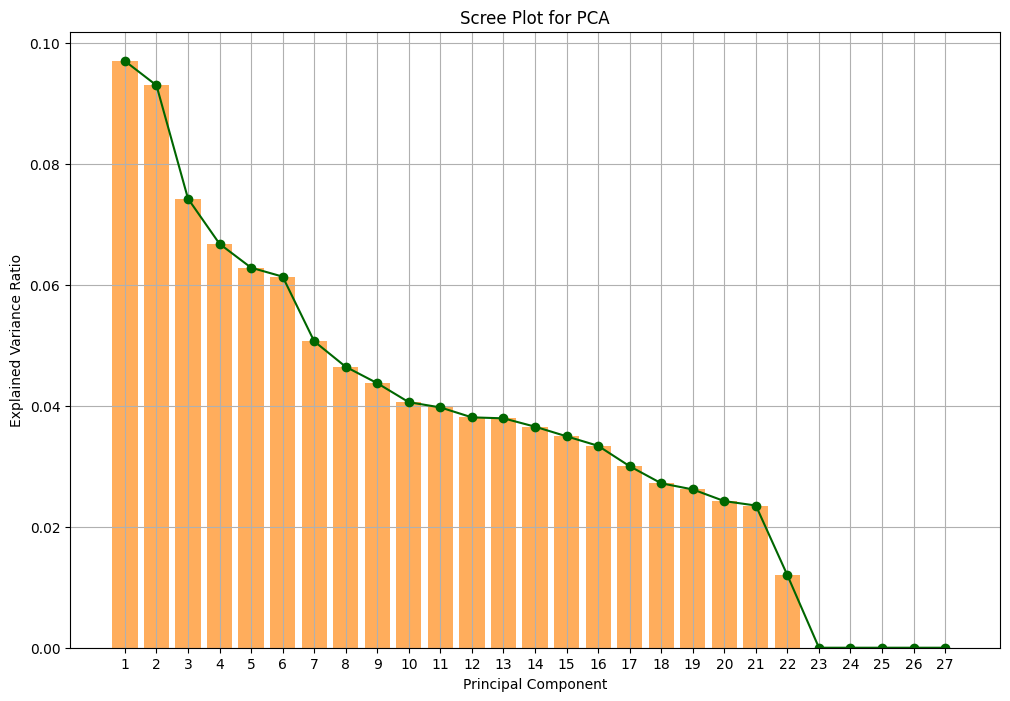

r2_Score of LinearRegression() model on training Data is: 51.350513771849336
r2_Score of LinearRegression() model on testing Data is: 50.20404761480612
RMSE of LinearRegression() model on training Data is: 8940.010533713794
RMSE of LinearRegression() model on testing Data is: 9131.322080396236
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.98016702247278
r2_Score of DecisionTreeRegressor() model on testing Data is: 44.22815632560565
RMSE of DecisionTreeRegressor() model on training Data is: 180.5065066238373
RMSE of DecisionTreeRegressor() model on testing Data is: 9663.715608526167
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.2749576758058
r2_Score of RandomForestRegressor() model on testing Data is: 72.01064226249038
RMSE of RandomForestReg

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [18385.48]
Test R2 Score: 0.7214, Test RMSE: 6829.7240
Predicted price using Decision Tree model: [12999.]
Test R2 Score: 0.4832, Test RMSE: 9302.5031
Predicted price using XGBoost model: [13317.487]
Test R2 Score: 0.7621, Test RMSE: 6311.3083
Predicted price using Linear Regression model: [13348.60769511]
Test R2 Score: 0.5020, Test RMSE: 9131.3221
Predicted price using Random Forest model: [18385.48]
Test R2 Score: 0.7214, Test RMSE: 6829.7240
Test MSE: 46645129.6310
Predicted price using Decision Tree model: [12999.]
Test R2 Score: 0.4832, Test RMSE: 9302.5031
Test MSE: 86536564.4194
Predicted price using XGBoost model: [13317.487]
Test R2 Score: 0.7621, Test RMSE: 6311.3083
Test MSE: 39832612.6880
Predicted price using Linear Regression model: [13348.60769511]
Test R2 Score: 0.5020, Test RMSE: 9131.3221
Test MSE: 833810

In [169]:
%run Vehicle_Clusters2.ipynb

['ak', 'hi']
2


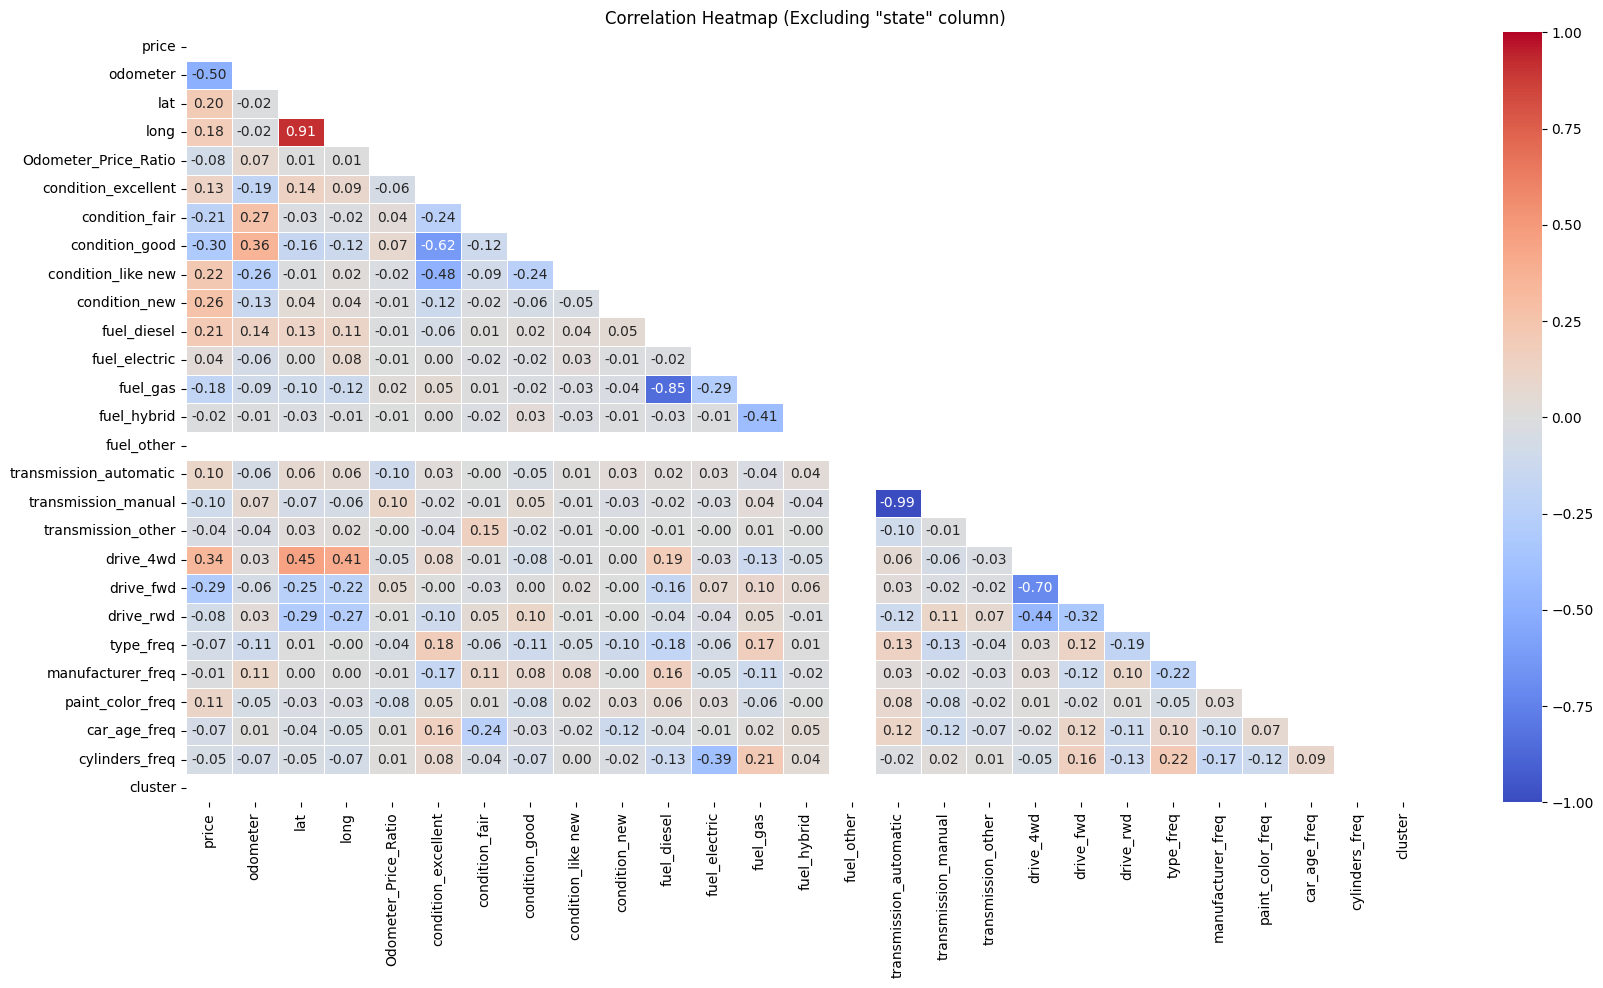

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


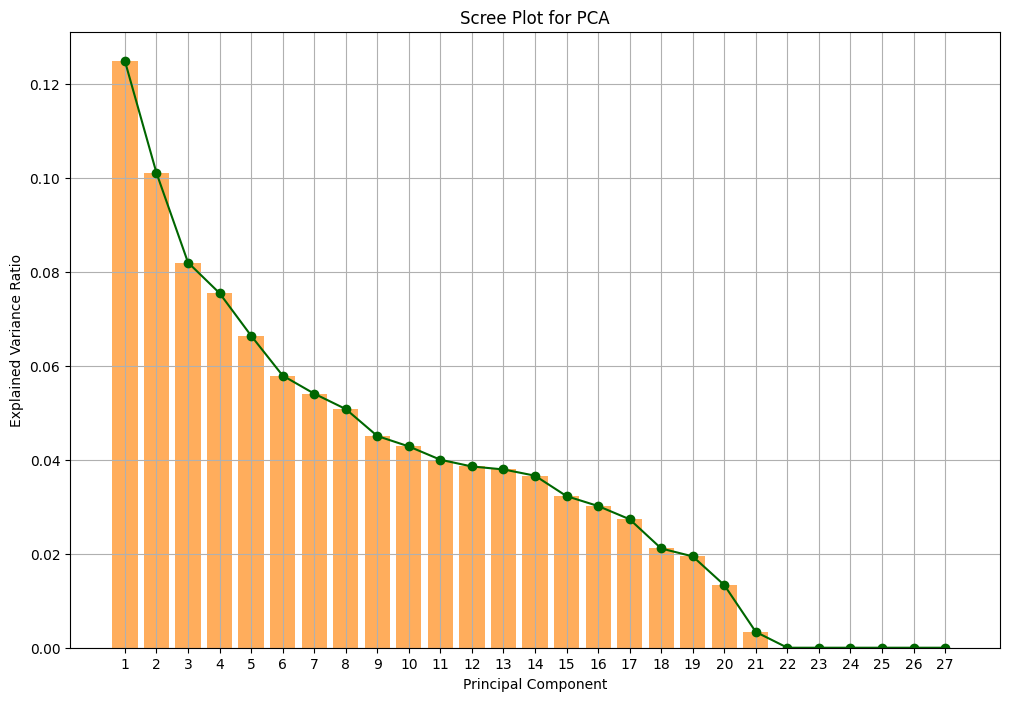

r2_Score of LinearRegression() model on training Data is: 50.491084335919155
r2_Score of LinearRegression() model on testing Data is: 44.69699344289274
RMSE of LinearRegression() model on training Data is: 11678.35674214154
RMSE of LinearRegression() model on testing Data is: 11070.107023930928
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99999113525936
r2_Score of DecisionTreeRegressor() model on testing Data is: 47.171858423397694
RMSE of DecisionTreeRegressor() model on training Data is: 4.941662111074008
RMSE of DecisionTreeRegressor() model on testing Data is: 10819.572836570474
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 94.81818187321664
r2_Score of RandomForestRegressor() model on testing Data is: 63.42595886721482
RMSE of RandomFores

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [14928.69]
Test R2 Score: 0.6247, Test RMSE: 9119.7511
Predicted price using Decision Tree model: [6799.]
Test R2 Score: 0.5003, Test RMSE: 10522.6785
Predicted price using XGBoost model: [11712.209]
Test R2 Score: 0.5863, Test RMSE: 9575.0307
Predicted price using Linear Regression model: [14764.21654843]
Test R2 Score: 0.4470, Test RMSE: 11070.1070
Predicted price using Random Forest model: [14928.69]
Test R2 Score: 0.6247, Test RMSE: 9119.7511
Test MSE: 83169860.6179
Predicted price using Decision Tree model: [6799.]
Test R2 Score: 0.5003, Test RMSE: 10522.6785
Test MSE: 110726763.8341
Predicted price using XGBoost model: [11712.209]
Test R2 Score: 0.5863, Test RMSE: 9575.0307
Test MSE: 91681213.4977
Predicted price using Linear Regression model: [14764.21654843]
Test R2 Score: 0.4470, Test RMSE: 11070.1070
Test MSE: 122

In [170]:
%run Vehicle_Clusters3.ipynb

['al', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'in', 'ky', 'me', 'md', 'ma', 'mi', 'mn', 'nc', 'nj', 'ny', 'nh', 'oh', 'pa', 'ri', 'tn', 'tx', 'vt', 'va', 'wv', 'wi']
28


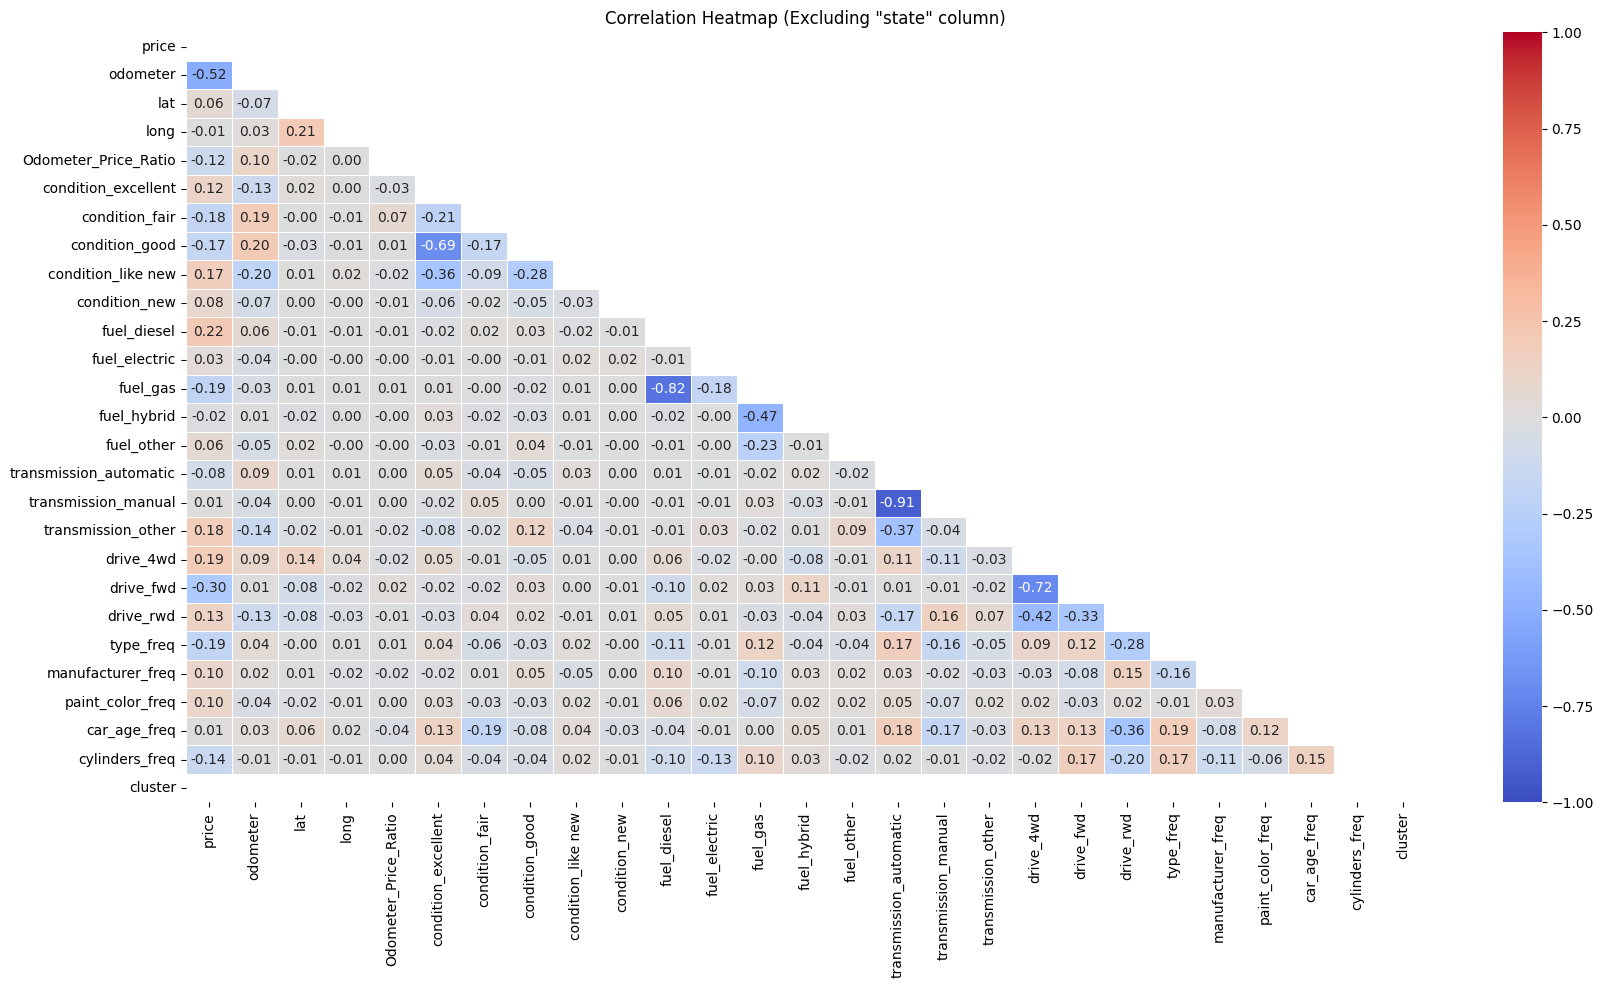

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


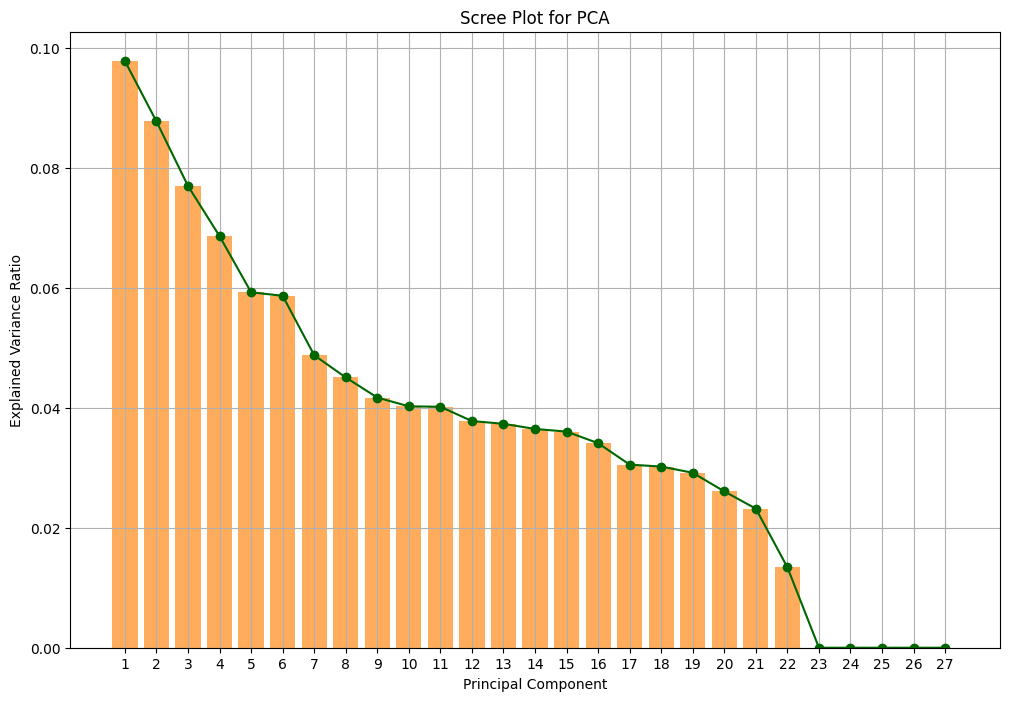

r2_Score of LinearRegression() model on training Data is: 46.505019866788
r2_Score of LinearRegression() model on testing Data is: 47.80399540682885
RMSE of LinearRegression() model on training Data is: 7411.2342901280335
RMSE of LinearRegression() model on testing Data is: 7221.23390956985
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99181323569675
r2_Score of DecisionTreeRegressor() model on testing Data is: 44.16215478627934
RMSE of DecisionTreeRegressor() model on training Data is: 91.68328615779336
RMSE of DecisionTreeRegressor() model on testing Data is: 7468.907962291118
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 95.53935245965872
r2_Score of RandomForestRegressor() model on testing Data is: 72.96935071869687
RMSE of RandomForestRegre

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [13812.]
Test R2 Score: 0.7288, Test RMSE: 5204.7299
Predicted price using Decision Tree model: [14488.]
Test R2 Score: 0.4264, Test RMSE: 7570.2069
Predicted price using XGBoost model: [12820.374]
Test R2 Score: 0.7675, Test RMSE: 4820.0171
Predicted price using Linear Regression model: [12131.97055369]
Test R2 Score: 0.4780, Test RMSE: 7221.2339
Predicted price using Random Forest model: [13812.]
Test R2 Score: 0.7288, Test RMSE: 5204.7299
Test MSE: 27089213.2306
Predicted price using Decision Tree model: [14488.]
Test R2 Score: 0.4264, Test RMSE: 7570.2069
Test MSE: 57308032.9906
Predicted price using XGBoost model: [12820.374]
Test R2 Score: 0.7675, Test RMSE: 4820.0171
Test MSE: 23232565.1848
Predicted price using Linear Regression model: [12131.97055369]
Test R2 Score: 0.4780, Test RMSE: 7221.2339
Test MSE: 52146219.1

In [171]:
%run Vehicle_Clusters4.ipynb